DOI: 10.21037/jtd.2020.02.64

http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml

1. 疾病传染模型S,I,R, 其中S易感者（Suspectible）,I患病者（Infectious）,R康复者（Recovered），其变化满足以下规律
   $$S\xrightarrow{\beta SI} I\xrightarrow{\mu I} R$$
   $$\left\{\begin{aligned}
               \frac{\mathrm{d}S}{\mathrm{d}t}&=-\beta SI \\
               \frac{\mathrm{d}I}{\mathrm{d}t}&=\beta SI -\mu I\\
               \frac{\mathrm{d}R}{\mathrm{d}t}&=\mu I
            \end{aligned}\right.$$
2. 疾病传染模型S,E,I,R, 其中E为无症状感染者（Exposed）,其变化满足以下规律
   $$S\xrightarrow{\beta SI} E\xrightarrow{\delta E} I\xrightarrow{\mu I} R$$
   $$\left\{\begin{aligned}
               \frac{\mathrm{d}S}{\mathrm{d}t}&=-\beta SI{\color{red}-\beta_2 SE}\\
               \frac{\mathrm{d}E}{\mathrm{d}t}&=\beta SI-\delta E {\color{red}+\beta_2SE}\\
               \frac{\mathrm{d}I}{\mathrm{d}t}&=\delta E -\mu I\\
               \frac{\mathrm{d}R}{\mathrm{d}t}&=\mu I
            \end{aligned}\right.$$

3. 若疫情叠加了春运，如何将人口的迁徙纳入模型？
$$S\xrightarrow{?}E\xrightarrow{\delta E}I\xrightarrow{\mu I}R$$

4. 我们假设该地随时间 $t$ 的人口输入、输出数量为 $A(t),B(t)$ ，这可以在 https://qianxi.baidu.com 上根据往年数据找到，可认为是已知函数。

5. 假设感染者、治愈者短期内不参与旅行，因此流动人口由未感染、潜伏者 $S,E$ 组成，其中 $E$ 占比为 $P$, 如果假设核酸检测才可旅行，而$P$即为核算检测失误率，是一个固定常数，那么
   1. 迁入未感染者 $S_{in}=A(t)(1-P)$
   2. 迁出未感染者 $S_{out}=B(t)(1-P)$
   3. 迁入无症状感染者 $E_{in}=A(t)P$
   4. 迁出无症状感染者 $E_{out}=B(t)P$
   得到方程
   $$S\xrightarrow{\beta SI} E\xrightarrow{\delta E} I\xrightarrow{\mu I} R$$
   $$\left\{\begin{aligned}
               \frac{\mathrm{d}S}{\mathrm{d}t}&=-\beta SI{\color{red}-\beta_2 SE}+(\color{blue}S_{in}-S_{out})\\
               \frac{\mathrm{d}E}{\mathrm{d}t}&=\beta SI-\delta E {\color{red}+\beta_2SE}+(\color{blue}E_{in}-E_{out})\\
               \frac{\mathrm{d}I}{\mathrm{d}t}&=\delta E -\mu I\\
               \frac{\mathrm{d}R}{\mathrm{d}t}&=\mu I
            \end{aligned}\right.$$

- 焦散曲线的历史：https://galileo-unbound.blog/2021/02/28/casual-caustics-and-the-optics-of-rays/
- 马克杯中的光影：https://www.zhihu.com/question/449718769/answers/updated
- 更精细的建模：https://github.com/BetaGem/Games/blob/main/cylinder.py
- 焦散曲线：https://mathworld.wolfram.com/Catacaustic.html

考虑单位圆周，设内侧镀有镜面，且假设光线只反射一次后，其强度便衰减至肉眼难以辨识。我们在$(1,0)$出放置点光源，求反射光在圆内的包络线。

设光发出后的首个反射点坐标为$(\cos \theta,\sin\theta)$，则二次反射点坐标为$(\cos 2\theta,\sin 2\theta)$, 因此反射光方程为
$$\frac{y-\sin\theta}{x-\cos\theta}=\frac{y-\sin 2\theta}{x-\cos 2\theta}$$
上述方程展开，
$$x(\sin2\theta-\sin\theta)+y(\cos\theta-\cos 2\theta)=\sin\theta$$

该等式关于$\theta$求导得 (<font color=blue>思考：为什么可以这样做？提示：包络，顾名思义，固定$x$时，$y$取极值 + 导数的几何含义。</font>)
$$x(2\cos2\theta-\cos\theta)+y(-\sin\theta+2\sin 2\theta)=\cos\theta$$

联立解得$x=\frac{2\cos\theta+\cos2\theta}{3},y=\frac{2\sin\theta+\sin2\theta}{3}$

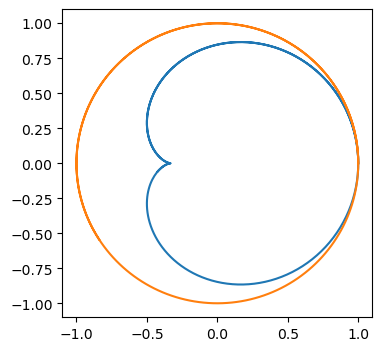

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,10,300)
x = (2*np.cos(t)+np.cos(2*t))/3
y = (2*np.sin(t)+np.sin(2*t))/3
a1 = np.cos(t)
a2 = np.sin(t)
plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.plot(a1,a2)
plt.show()

解方程 $$\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=f(x)$$

这个方程不显含$t$, 因此采用链导换元，令$\frac{\mathrm{d}x}{\mathrm{d}t}=v$，则$\frac{\mathrm{d}v}{\mathrm{d}t}=f(x)$
$$\frac{\mathrm{d}v}{\mathrm{d}x}\frac{\mathrm{d}x}{\mathrm{d}t}=f(x)$$
$$v\frac{\mathrm{d}v}{\mathrm{d}x}=f(x)$$
$$\frac{1}{2}v^2+C= F(x)$$
$$v=\pm\sqrt{2F(x)-C}$$
$$\frac{\mathrm{d}x}{\mathrm{d}t}=\pm\sqrt{2F(x)-C}$$
$$\frac{\mathrm{d}x}{\pm\sqrt{2F(x)-C}}=\mathrm{d}t$$
$$t=\int\frac{\mathrm{d}x}{\pm\sqrt{2F(x)-C}}+C_2$$

对单摆，若$x$是摆动角度，则 $f(x)=-a^2\sin x$, $F(x)=a^2\cos x-C$, $$t=\pm\int\frac{\mathrm{d}x}{\sqrt{2a^2\cos x-C_1}}+C_2$$

这个方程解不出来，中学时，我们的办法是进行近似$f(x)=-a^2x$, 得到$F(x)=-\frac{a^2x^2}{2}$, $C_1=-c^2<0$
 $$t=\int\frac{\mathrm{d}x}{\sqrt{c^2-a^2x^2}}+C_2=\frac{1}{a}\arcsin\frac{ax}{c}+C_2$$
$$x=\frac{c}{a}\sin(at+D)$$

如果我们一定要研究大幅度的单摆，不必进一步研究椭圆积分。事实上，写到$\frac{1}{2}v^2+C=F(x)$即可停笔，作出“位移-速度”图即可看到物理图像。

注意到，对于二阶方程，位移-速度这两个初值，已经完全决定了系统的演化，因此位移-速度图包含了关于方程演化的所有信息。

我们解方程时发现 $y'=\sqrt{|y|}$, 这个一阶方程的通解无法由一个参数给出。事实上，高阶方程也有类似的现象： $y''=\sqrt{|y|}$ 给定初值的解不唯一。

如果想象$y''$是加速度，力与$\sqrt{|y|}$成正比，一同推导后，我们找到了对应的具体物理图像：从半立方抛物线 $-r^{3/2}$ 穹顶上滚下小球的运动方程。

力学可以用微分方程刻画，那么微分方程的解不唯一，是否说明了这个世界不是“决定论”的？

有哪些你觉得特别有意思的物理学悖论？ - 贾明子的回答 - 知乎 https://www.zhihu.com/question/397610640/answer/2617547404

## 1. 双重外积公式

$$(\mathbf{a}\times\mathbf{b})\times\mathbf{c}=(\mathbf{a},\mathbf{c})\mathbf{b}-(\mathbf{b},\mathbf{c})\mathbf{a}$$

1. $(\mathbf{a}\times\mathbf{b})\times\mathbf{c}$ 一定与 $\mathbf{a}\times \mathbf{b}$ 垂直，因此可表示为 $\mathbf{a},\mathbf{b}$ 的线性组合。

2. 因此不妨设 $(\mathbf{a}\times\mathbf{b})\times\mathbf{c}=x\mathbf{a}+y\mathbf{b}$

3. 两边同时与 $\mathbf{c}$ 点乘，得知 $x(\mathbf{a},\mathbf{c})+y(\mathbf{b},\mathbf{c})=0$, 因此 $$\frac{x}{y}=-\frac{(\mathbf{b},\mathbf{c})}{(\mathbf{a},\mathbf{c})}.$$

4. 因此 $(\mathbf{a}\times\mathbf{b})\times\mathbf{c}=k((\mathbf{a},\mathbf{c})\mathbf{b}-(\mathbf{b},\mathbf{c})\mathbf{a})$

5. 思考：如何进一步得到上述 $k=1$ ？

## 2. 柯西-比涅恒等式
$$(\mathbf{a}\times\mathbf{b})\cdot(\mathbf{c}\times\mathbf{d})=(\mathbf{a},\mathbf{c})(\mathbf{b},\mathbf{d})-(\mathbf{a},\mathbf{d})(\mathbf{b},\mathbf{c})$$

1. 根据混合积性质，有 $$(\mathbf{a}\times\mathbf{b})\cdot{\color{red}(\mathbf{c}\times\mathbf{d})}=({\color{red}(\mathbf{c}\times\mathbf{d})\color{red}}\times\mathbf{a})\cdot\mathbf{b}$$

2. 代入双重外积公式，你得到什么？

## 3. 拉格朗日恒等式

$$|\mathbf{a}\times\mathbf{b}|^2=|\mathbf{a}|^2|\mathbf{b}|^2-(\mathbf{a},\mathbf{b})^2$$

1. 思考：除了课本上的展开计算，能不能通过上述恒等式更简洁地推导？

## 4. 雅可比恒等式
$$(\mathbf{a}\times\mathbf{b})\times\mathbf{c}+(\mathbf{b}\times\mathbf{c})\times\mathbf{a}+(\mathbf{c}\times\mathbf{a})\times\mathbf{b}=0$$

1. 思考：如何证明？

## 5. 矢量四重积 

$$(\mathbf{a}\times\mathbf{b})\times(\mathbf{c}\times\mathbf{d})=(\mathbf{a},\mathbf{b},\mathbf{d})\mathbf{c}-(\mathbf{a},\mathbf{b},\mathbf{c})\mathbf{d}$$
$$(\mathbf{a}\times\mathbf{b})\times(\mathbf{c}\times\mathbf{d})=(\mathbf{a},\mathbf{c},\mathbf{d})\mathbf{b}-(\mathbf{b},\mathbf{c},\mathbf{d})\mathbf{a}$$

1. 思考：如何证明？

2. 比较等式右端，得到 $$\mathbf{d}=\frac{(\mathbf{d,b,c})}{(\mathbf{a,b,c})}\mathbf{a}+\frac{(\mathbf{d,c,a})}{(\mathbf{a,b,c})}\mathbf{b}+\frac{(\mathbf{d,a,b})}{(\mathbf{a,b,c})}\mathbf{c}$$
   这个等式有什么含义？与Cramer法则有何联系？

## 6. 微分算子的矢量操作（较难）

1. 我们记符号向量 $\nabla=(\partial_1,\partial_2,\partial_3)$。

2. 对于向量值函数 $\mathbf{a}=(a_1,a_2,a_3)$, 其中 $a_1,a_2,a_3$都是关于$x,y,z$的函数，记
    $$\nabla\cdot \mathbf{a}=\partial_1a_1+\partial_2a_2+\partial_3a_3$$
       $$\nabla\times \mathbf{a}=(\partial_2a_3-\partial_3a_2,\partial_3a_1-\partial_1a_3,\partial_1a_2-\partial_2a_1)$$
   
4. 我们定义非点乘、非叉乘的<font color=blue>“依次求导”</font> $$\nabla\mathbf{a}=(\partial_1a_1,\partial_2a_2,\partial_3a_3)$$对于函数$f$, 我们记向量 $\mathbf{f}=(f,f,f)$, 并定义$\nabla f=\nabla \mathbf{f}$。所以$\nabla$既可以直接作用在（函）数上，也可以作用在向量（值函数）上，都得到向量值函数。

4. 稍作小结，$\nabla\cdot$ 把向量变成数，$\nabla\times$ 把向量变成向量，$\nabla$ 把向量变成向量，把数也变成向量。

5. “依次求导”满足莱布尼茨法则
      $$\nabla(ab)=(\nabla a) b+a(\nabla b)$$
   $$\nabla(\mathbf{a\cdot b})=\nabla \mathbf{a}\cdot  \mathbf{b}+\mathbf{a}\cdot \nabla \mathbf{b}$$
      $$\nabla(\mathbf{a\times b})=(\nabla\mathbf{a})\times\mathbf{b}+\mathbf{a}\times(\nabla \mathbf{b})$$
      $$\nabla(\mathbf{a} b)=(\nabla\mathbf{a})b+\mathbf{a}\cdot(\nabla b)$$
      

6. 算子点乘满足以下法则（你能看出其规律吗？）
   $$\nabla\cdot (\mathbf{a}b)=(\nabla\mathbf{a})b+\mathbf{a}\cdot(\nabla b)$$

   $$\nabla\cdot (\mathbf{a\times b})=(\nabla\times\mathbf{a})\cdot\mathbf{b}-\mathbf{a}\cdot(\nabla\times\mathbf{b})$$
7. 算子叉乘满足以下法则（你能看出其规律吗？）
   $$\nabla\times(\mathbf{a}b)=(\nabla\times \mathbf{a})b -\mathbf{a}\times\nabla b$$
   $$\nabla\times(\mathbf{a\times b})=((\nabla\mathbf{a})\cdot\mathbf{b}-\mathbf{a}\cdot(\nabla\mathbf{b}))-((\nabla\cdot\mathbf{a})\mathbf{b}-\mathbf{a}(\nabla\cdot\mathbf{b}))$$

<font color=red> https://zhuanlan.zhihu.com/p/52834609</font>

8. 以上是算子的一阶导，对于算子二阶导，我们有
   $$\nabla\cdot(\nabla\times \mathbf{a})=0$$
   $$\nabla\times(\nabla a)=0$$
   但请注意第二个算式一般不成立：$$\nabla\times(\nabla \mathbf{a})=\nabla\times(\partial_1a_1,\partial_2a_2,\partial_3a_3)$$
   $$=(\partial_{23}a_3-\partial_{32}a_2,...)\neq\mathbf{0}$$